In [1]:
import os
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from tqdm import tqdm

In [2]:
from code import model
from code.data import Dataset

In [3]:
root = os.getcwd()
batch = 8

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")

# Model

In [4]:
encoder = model.Extractor(in_channels=1, out_channels=1)
decoder = model.Decoder(classes=1)


predictor = model.Model(encoder=encoder, decoder=decoder).to(device)
optimizer = torch.optim.Adam(predictor.parameters(), lr=1e-4)

In [5]:
dataset = Dataset(path=os.path.join(root, "training.csv"))

In [6]:
trainloader = DataLoader(dataset, batch_size=batch, shuffle=False, num_workers=2)

In [7]:
slot = 0
profit = 0

In [ ]:
predictor.train()

for epoch in range(100):

    epoch_loss = 0
    
    for index, data in tqdm(enumerate(trainloader)):

        optimizer.zero_grad()

        data, gt = data # batch, 100, 4
        gt = gt[:, :, 0].to(device, dtype=torch.float)

        data = torch.unsqueeze(data, 1) # batch, channels, 100, 4
        data = torch.transpose(data, 2, 3) # batch, channels, 4, 100

        data = data.to(device, dtype=torch.float)

        _, pr = predictor(data)

        loss = nn.MSELoss()(pr, gt)
        loss.backward()
        optimizer.step()
    
        epoch_loss += loss.item()
    
    print("\nEpoch: {}, mse= {:.3f}".format(epoch+1, epoch_loss))
    
    epoch_loss = 0

145it [00:09, 15.33it/s]


Epoch: 1, mse= 54.174



145it [00:10, 13.93it/s]


Epoch: 2, mse= 19.468



145it [00:09, 15.41it/s]


Epoch: 3, mse= 1.755



145it [00:09, 15.77it/s]


Epoch: 4, mse= 1.222



145it [00:10, 13.87it/s]


Epoch: 5, mse= 1.239



145it [00:10, 13.53it/s]


Epoch: 6, mse= 1.232



101it [00:07, 13.23it/s]

In [ ]:
predictor.eval()

for index, data in tqdm(enumerate(trainloader)):

    data, gt = data # batch, 100, 4
    gt = gt[:, :, 0].to(device, dtype=torch.float)
    
    data = torch.unsqueeze(data, 1) # batch, channels, 100, 4
    data = torch.transpose(data, 2, 3) # batch, channels, 4, 100

    data = data.to(device, dtype=torch.float)

    _, pr = predictor(data)
    
    print(gt, pr)

In [ ]:
pred = predictor

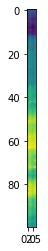

In [12]:
plt.imshow(dataset[0])

In [26]:
dataset[1259]

array([], shape=(0, 4), dtype=float64)

In [24]:
len(dataset)

1158